# 1. *installation*

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install spacy

import pandas as pd
import re
import spacy
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline



# 2. *Competitor Mentions in Customer Reviews*

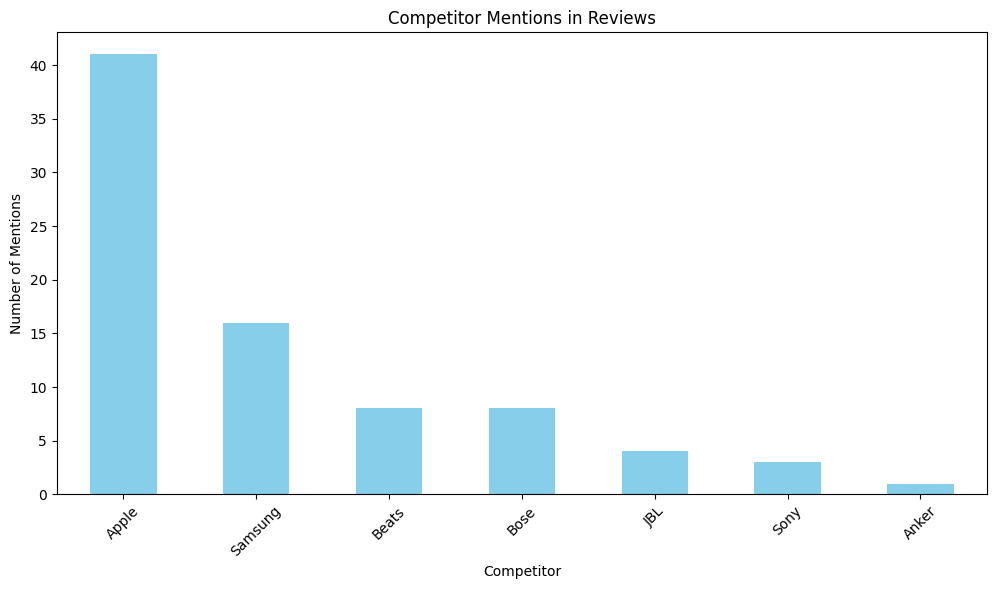

✅ Analysis Complete! CSV file updated with competitor mentions.


In [ ]:


# Step 1: Load data
file_path = r"D:\datathone_project\aba_output_with_scores.csv"
df = pd.read_csv(file_path)

# Step 2: Convert timestamp
try:
    df['timestamp'] = pd.to_datetime(df['timestamp'].astype(float) / 1000, unit='s')
except Exception as e:
    print(f"Error converting timestamp: {e}")

# Step 3: Aspect Keyword Mapping
aspect_keywords = {
    1: ('Battery Life', ['battery', 'charge', 'charging']),
    2: ('Sound Quality', ['sound', 'audio', 'bass', 'treble']),
    3: ('Comfort/Fit', ['fit', 'comfort', 'comfortable', 'ear']),
    4: ('Build Quality / Durability', ['build', 'durable', 'durability', 'broke', 'quality']),
    5: ('Design / Shape / Style', ['design', 'shape', 'style', 'look', 'appearance']),
    6: ('Price / Value for Money', ['price', 'cost', 'value', 'expensive', 'cheap']),
    7: ('Controls / Touch Functionality', ['controls', 'buttons', 'touch', 'tap'])
}

def extract_features(row):
    features = []
    for num in str(row).replace(' ', '').split(','):
        try:
            features.append(aspect_keywords.get(int(num), ("Unknown", []))[0])
        except ValueError:
            pass  # Skip invalid entries
    return features

df['features_list'] = df['Feature_Number'].astype(str).apply(extract_features)

# Step 4: Competitor Detection (Updated)
competitors = ['Sony', 'Bose', 'Samsung', 'Apple', 'JBL', 'Beats', 'Anker', 'Sennheiser']  # Add more as needed
def extract_competitors(text):
    detected = []
    for comp in competitors:
        if re.search(rf"\b{comp}\b", text, re.IGNORECASE):
            detected.append(comp)
    return detected if detected else ["No Competitor"]

df['competitors'] = df['cleaned_text'].astype(str).apply(extract_competitors)

# Step 5: Flattening and Counting Competitors
all_competitors = [comp for sublist in df['competitors'] for comp in sublist if comp != "No Competitor"]
competitor_counts = pd.Series(Counter(all_competitors)).sort_values(ascending=False)

# Plotting Competitor Mentions
if not competitor_counts.empty:
    plt.figure(figsize=(12, 6))
    competitor_counts.plot(kind='bar', color='skyblue')
    plt.title("Competitor Mentions in Reviews")
    plt.xlabel("Competitor")
    plt.ylabel("Number of Mentions")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("⚠️ No competitor mentions found!")

print("✅ Analysis Complete! CSV file updated with competitor mentions.")


config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

c:\Users\Divy\AppData\Local\Programs\Python\Python313\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Divy\.cache\huggingface\hub\models--dslim--bert-base-NER. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
c:\Users\Divy\AppData\Local\Programs\Python\Python313\Lib\site-packages\huggingface_hub\file_download.py:651: UserWarning: Not enough free disk space to download the file. The expected file size is: 0.00 MB. The target location C:\Users\Divy\.cache\huggingface\hub\models--dslim--bert-base-NER\blobs only has 0.00 MB free disk space.
  wa

tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

c:\Users\Divy\AppData\Local\Programs\Python\Python313\Lib\site-packages\huggingface_hub\file_download.py:651: UserWarning: Not enough free disk space to download the file. The expected file size is: 0.21 MB. The target location C:\Users\Divy\.cache\huggingface\hub\models--dslim--bert-base-NER\blobs only has 0.00 MB free disk space.
  warnings.warn(


vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu
c:\Users\Divy\AppData\Local\Programs\Python\Python313\Lib\site-packages\transformers\pipelines\token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


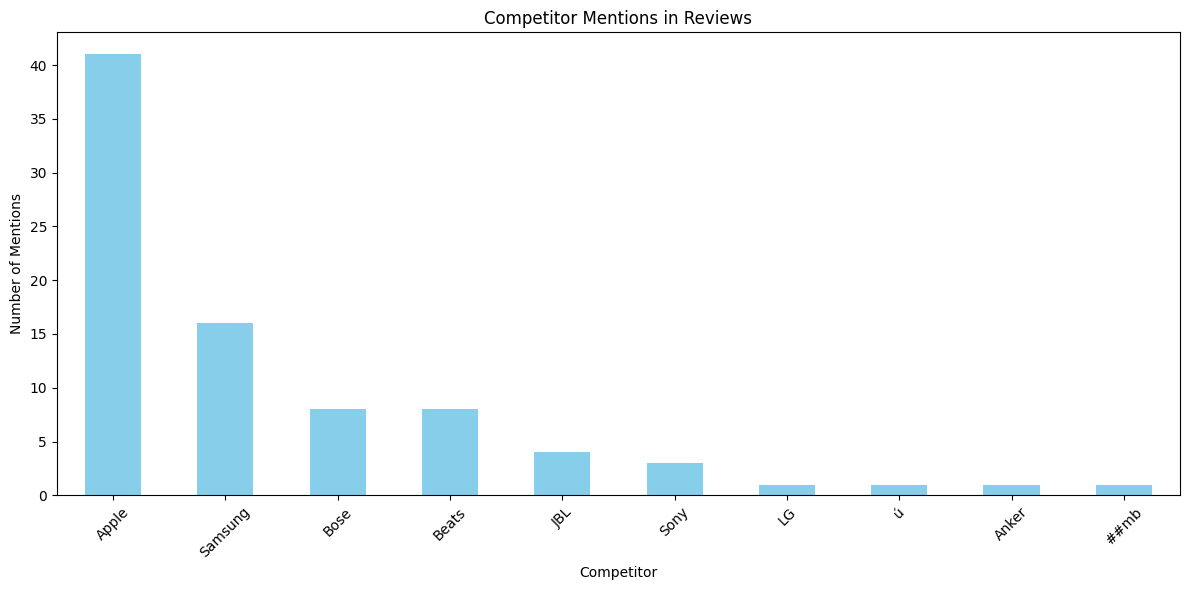

✅ Competitor analysis complete!


In [ ]:

# Load data
file_path = r"D:\datathone_project\aba_output_with_scores.csv"
df = pd.read_csv(file_path)

# Initialize NER model
ner_pipeline = pipeline("ner", model="dslim/bert-base-NER", grouped_entities=True)

# Hardcoded competitor brands
hardcoded_competitors = ['Sony', 'Bose', 'Samsung', 'Apple', 'JBL', 'Beats', 'Anker', 'Sennheiser', 'LG', 'Huawei']

# Regex-based detection from known competitors
def extract_hardcoded_competitors(text):
    detected = []
    for comp in hardcoded_competitors:
        if re.search(rf"\b{re.escape(comp)}\b", text, re.IGNORECASE):
            detected.append(comp)
    return detected

# Transformer-based NER competitor extraction
def extract_transformer_ner(text):
    detected = []
    entities = ner_pipeline(text[:512])  # Limit for long texts
    for ent in entities:
        if ent['entity_group'] == 'ORG':
            detected.append(ent['word'])
    return detected

# Combine both methods
def extract_all_competitors(text):
    detected = extract_hardcoded_competitors(text)
    detected += extract_transformer_ner(text)
    return list(set(detected)) if detected else ["No Competitor"]

# Apply extraction
df['competitors'] = df['cleaned_text'].astype(str).apply(extract_all_competitors)

# Flatten and count
all_competitors = [c for sublist in df['competitors'] for c in sublist if c != "No Competitor"]
competitor_counts = pd.Series(Counter(all_competitors)).sort_values(ascending=False)

# Plot results
if not competitor_counts.empty:
    plt.figure(figsize=(12, 6))
    competitor_counts.plot(kind='bar', color='skyblue')
    plt.title("Competitor Mentions in Reviews")
    plt.xlabel("Competitor")
    plt.ylabel("Number of Mentions")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No competitor mentions found!")

print("✅ Competitor analysis complete!")


# 3. *Sentiment Distribution of Competitor Mentions in Customer Reviews*

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
c:\Users\Divy\AppData\Local\Programs\Python\Python313\Lib\site-packages\transformers\pipelines\token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(
No model was sup

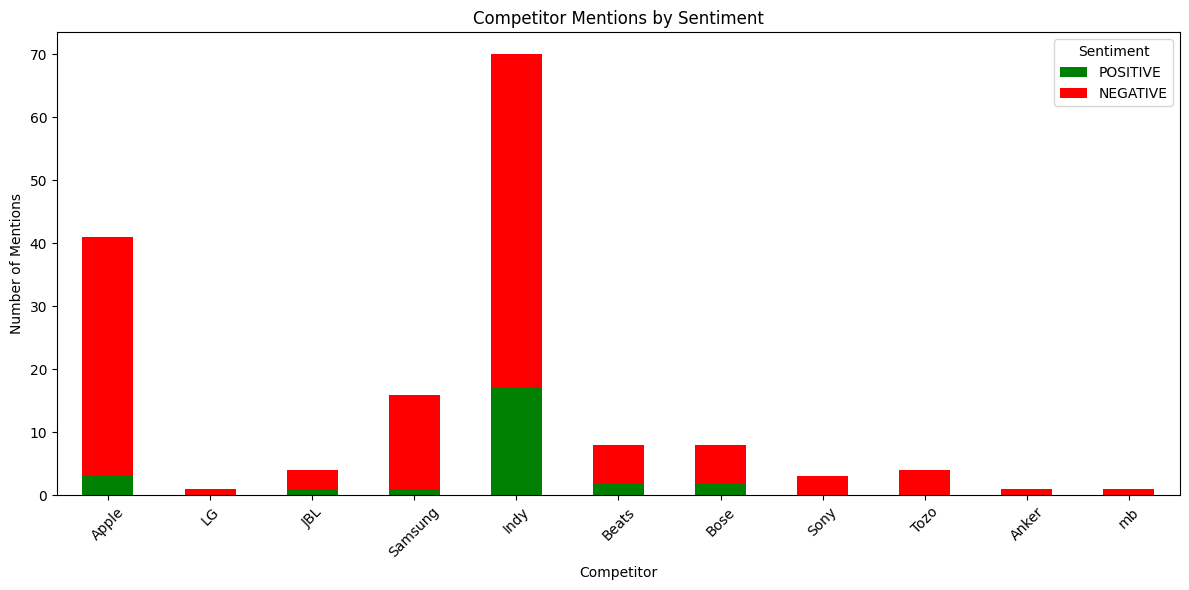

✅ Competitor sentiment analysis complete!


In [ ]:

# Load data
file_path = r"D:\datathone_project\aba_output_with_scores.csv"
df = pd.read_csv(file_path)

# Initialize models
ner_pipeline = pipeline("ner", model="dslim/bert-base-NER", grouped_entities=True)
sentiment_pipeline = pipeline("sentiment-analysis")

# Competitor list including 'Indy' and 'Tozo'
hardcoded_competitors = [
    'Sony', 'Bose', 'Samsung', 'Apple', 'JBL', 'Beats',
    'Anker', 'Sennheiser', 'LG', 'Huawei', 'Indy', 'Tozo'
]

# Extract hardcoded competitors
def extract_hardcoded_competitors(text):
    return [comp for comp in hardcoded_competitors if re.search(rf"\b{re.escape(comp)}\b", text, re.IGNORECASE)]

# Extract using transformer NER
def extract_transformer_ner(text):
    entities = ner_pipeline(text[:512])  # Truncate long texts
    return [ent['word'] for ent in entities if ent['entity_group'] == 'ORG']

# Robust sentiment analysis
def analyze_sentiment(text):
    try:
        result = sentiment_pipeline(text[:512])[0]
        label = result['label'].upper()
        return 'POSITIVE' if label == 'POSITIVE' else 'NEGATIVE'
    except Exception as e:
        print(f"[Warning] Sentiment analysis failed: {e}")
        return 'NEGATIVE'

# Clean and validate competitor names
def clean_competitor_name(name):
    return re.sub(r'[^a-zA-Z]', '', name).strip()

def is_valid_name(name):
    return name.isalpha() and len(name) > 1

# Main extraction function
def extract_competitors_with_sentiment(text):
    competitors = extract_hardcoded_competitors(text) + extract_transformer_ner(text)
    competitors = list(set(competitors))
    sentiment = analyze_sentiment(text)
    return [(clean_competitor_name(comp), sentiment) for comp in competitors if is_valid_name(clean_competitor_name(comp))]

# Apply to dataframe
df['competitors_sentiments'] = df['cleaned_text'].astype(str).apply(extract_competitors_with_sentiment)

# Count sentiment per competitor
sentiment_counts = defaultdict(Counter)
for entry in df['competitors_sentiments']:
    for comp, sentiment in entry:
        sentiment_counts[comp][sentiment] += 1

# Convert to DataFrame
sentiment_df = pd.DataFrame(sentiment_counts).fillna(0).T
sentiment_df = sentiment_df[['POSITIVE', 'NEGATIVE']] if {'POSITIVE','NEGATIVE'}.issubset(sentiment_df.columns) else sentiment_df

# Plot
if not sentiment_df.empty:
    sentiment_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=['green', 'red'])
    plt.title("Competitor Mentions by Sentiment")
    plt.xlabel("Competitor")
    plt.ylabel("Number of Mentions")
    plt.xticks(rotation=45)
    plt.legend(title='Sentiment')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No competitor mentions found!")

print("✅ Competitor sentiment analysis complete!")


Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
c:\Users\Divy\AppData\Local\Programs\Python\Python313\Lib\site-packages\transformers\pipelines\token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(
No model was sup

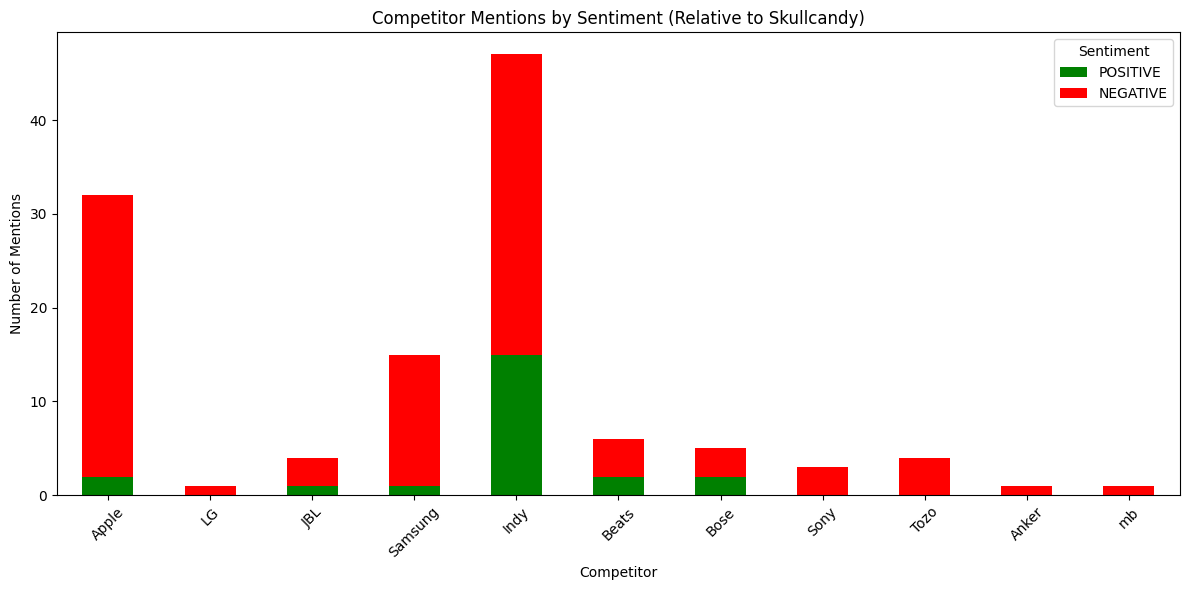

✅ Competitor sentiment analysis complete!


In [ ]:

# Load data
file_path = r"D:\datathone_project\aba_output_with_scores.csv"
df = pd.read_csv(file_path)

# Initialize models
ner_pipeline = pipeline("ner", model="dslim/bert-base-NER", grouped_entities=True)
sentiment_pipeline = pipeline("sentiment-analysis")

# Competitor list including 'Indy' and 'Tozo'
hardcoded_competitors = [
    'Sony', 'Bose', 'Samsung', 'Apple', 'JBL', 'Beats',
    'Anker', 'Sennheiser', 'LG', 'Huawei', 'Indy', 'Tozo'
]
brand_name = "Skullcandy"

# Extract hardcoded competitors
def extract_hardcoded_competitors(text):
    return [comp for comp in hardcoded_competitors if re.search(rf"\b{re.escape(comp)}\b", text, re.IGNORECASE)]

# Extract using transformer NER
def extract_transformer_ner(text):
    entities = ner_pipeline(text[:512])
    return [ent['word'] for ent in entities if ent['entity_group'] == 'ORG']

# Sentiment analysis (robust)
def analyze_sentiment(text):
    try:
        result = sentiment_pipeline(text[:512])[0]
        label = result['label'].upper()
        return 'POSITIVE' if label == 'POSITIVE' else 'NEGATIVE'
    except Exception as e:
        print(f"[Warning] Sentiment analysis failed: {e}")
        return 'NEUTRAL'

# Clean and validate competitor names
def clean_competitor_name(name):
    return re.sub(r'[^a-zA-Z]', '', name).strip()

def is_valid_name(name):
    return name.isalpha() and len(name) > 1 and name.lower() != brand_name.lower()

# Extract competitors with relevant sentiment
def extract_competitors_with_sentiment(text):
    competitors = extract_hardcoded_competitors(text) + extract_transformer_ner(text)
    competitors = list(set([clean_competitor_name(c) for c in competitors if is_valid_name(clean_competitor_name(c))]))

    if not competitors:
        return []

    sentiment = analyze_sentiment(text)

    # Check if Skullcandy is mentioned
    contains_brand = bool(re.search(rf"\b{re.escape(brand_name)}\b", text, re.IGNORECASE))

    # Rule: if both Skullcandy and competitors are mentioned, we assume sentiment is about comparison
    tagged_competitors = []
    for comp in competitors:
        if contains_brand:
            if 'than' in text.lower() or 'vs' in text.lower() or 'compared' in text.lower():
                # In comparative context, invert sentiment for competitors
                inverted_sentiment = 'NEGATIVE' if sentiment == 'POSITIVE' else 'POSITIVE'
                tagged_competitors.append((comp, inverted_sentiment))
            else:
                # Cannot infer clearly — mark as NEUTRAL
                tagged_competitors.append((comp, 'NEUTRAL'))
        else:
            # No mention of Skullcandy — assume sentiment is about competitor
            tagged_competitors.append((comp, sentiment))

    return tagged_competitors

# Apply extraction
df['competitors_sentiments'] = df['cleaned_text'].astype(str).apply(extract_competitors_with_sentiment)

# Count sentiment per competitor
sentiment_counts = defaultdict(Counter)
for entry in df['competitors_sentiments']:
    for comp, sentiment in entry:
        if sentiment != "NEUTRAL":  # Optionally skip NEUTRAL
            sentiment_counts[comp][sentiment] += 1

# Convert to DataFrame
sentiment_df = pd.DataFrame(sentiment_counts).fillna(0).T
sentiment_df = sentiment_df[['POSITIVE', 'NEGATIVE']] if {'POSITIVE','NEGATIVE'}.issubset(sentiment_df.columns) else sentiment_df

# Plot
if not sentiment_df.empty:
    sentiment_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=['green', 'red'])
    plt.title("Competitor Mentions by Sentiment (Relative to Skullcandy)")
    plt.xlabel("Competitor")
    plt.ylabel("Number of Mentions")
    plt.xticks(rotation=45)
    plt.legend(title='Sentiment')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No competitor mentions found!")

print("✅ Competitor sentiment analysis complete!")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


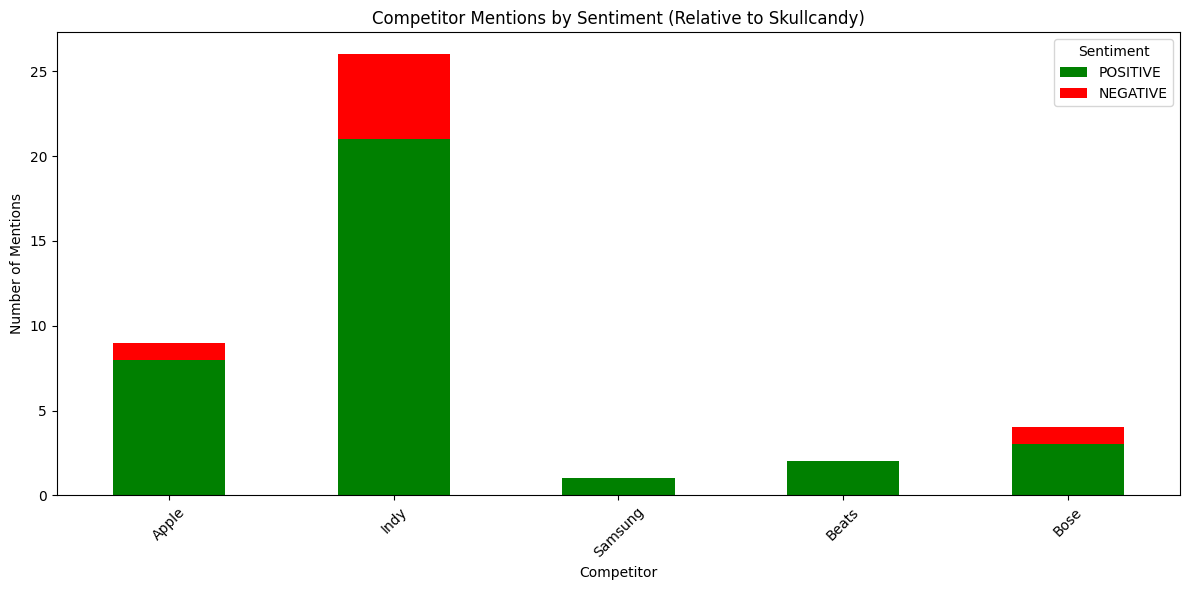

✅ Competitor sentiment analysis complete.


In [4]:
import pandas as pd
import re
from collections import Counter, defaultdict
from transformers import pipeline
import matplotlib.pyplot as plt

# Load CSV
file_path = r"D:\datathone_project\aba_output_with_scores.csv"
df = pd.read_csv(file_path)

# Define product and competitors
main_product = "Skullcandy"
competitors = [
    'Sony', 'Bose', 'Samsung', 'Apple', 'JBL', 'Beats',
    'Anker', 'Sennheiser', 'LG', 'Huawei', 'Indy', 'Tozo'
]

# Pipelines
sentiment_pipeline = pipeline("sentiment-analysis")

# Clean name
def clean_name(name):
    return re.sub(r'[^a-zA-Z]', '', name)

# Sentiment toward competitor from Skullcandy’s perspective
def competitor_sentiment_logic(text):
    found_comps = [comp for comp in competitors if re.search(rf"\b{re.escape(comp)}\b", text, re.IGNORECASE)]
    contains_skullcandy = bool(re.search(r'\bskullcandy\b', text, re.IGNORECASE))

    if not found_comps or not contains_skullcandy:
        return []  # Ignore if no competitor or Skullcandy not in context

    try:
        sentiment = sentiment_pipeline(text[:512])[0]['label'].upper()
    except Exception as e:
        print(f"[Error] Sentiment analysis failed: {e}")
        return []

    adjusted_sentiment = 'NEGATIVE' if sentiment == 'POSITIVE' else 'POSITIVE'
    return [(clean_name(comp), adjusted_sentiment) for comp in found_comps if len(clean_name(comp)) > 1]

# Apply
df['competitor_sentiments'] = df['cleaned_text'].astype(str).apply(competitor_sentiment_logic)

# Count
sentiment_counts = defaultdict(Counter)
for row in df['competitor_sentiments']:
    for comp, sent in row:
        sentiment_counts[comp][sent] += 1

# DataFrame
sentiment_df = pd.DataFrame(sentiment_counts).fillna(0).T
sentiment_df = sentiment_df[['POSITIVE', 'NEGATIVE']] if {'POSITIVE','NEGATIVE'}.issubset(sentiment_df.columns) else sentiment_df

# Plot
if not sentiment_df.empty:
    sentiment_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=['green', 'red'])
    plt.title("Competitor Mentions by Sentiment (Relative to Skullcandy)")
    plt.xlabel("Competitor")
    plt.ylabel("Number of Mentions")
    plt.xticks(rotation=45)
    plt.legend(title='Sentiment')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No relevant competitor mentions found.")

print("✅ Competitor sentiment analysis complete.")


Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
c:\Users\Divy\AppData\Local\Programs\Python\Python313\Lib\site-packages\transformers\pipelines\token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(
No model was sup

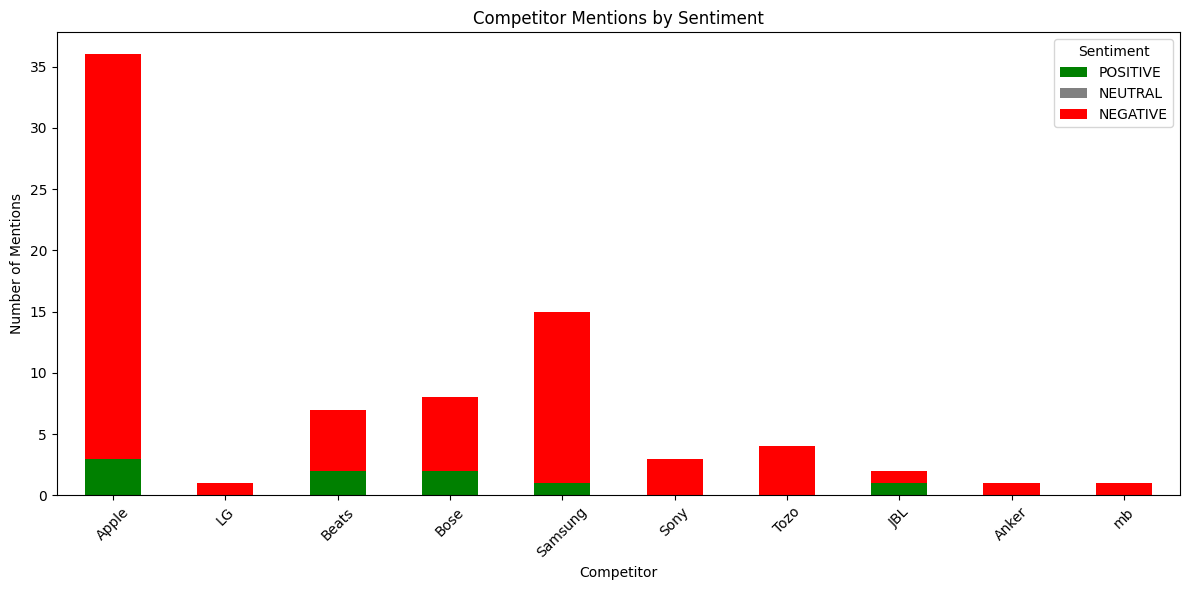

✅ CSV updated and sentiment graph plotted!


In [1]:
import pandas as pd
import re
from collections import Counter, defaultdict
from transformers import pipeline
import matplotlib.pyplot as plt

# Load data
file_path = r"D:\datathone_project\aba_output_with_scores.csv"
df = pd.read_csv(file_path)

# Initialize models
ner_pipeline = pipeline("ner", model="dslim/bert-base-NER", grouped_entities=True)
sentiment_pipeline = pipeline("sentiment-analysis")

# Competitor list (Indy removed)
hardcoded_competitors = [
    'Sony', 'Bose', 'Samsung', 'Apple', 'JBL', 'Beats',
    'Anker', 'Sennheiser', 'LG', 'Huawei', 'Tozo'
]

# Extract hardcoded competitors
def extract_hardcoded_competitors(text):
    return [comp for comp in hardcoded_competitors if re.search(rf"\b{re.escape(comp)}\b", text, re.IGNORECASE)]

# Extract competitors using transformer NER
def extract_transformer_ner(text):
    entities = ner_pipeline(text[:512])
    return [ent['word'] for ent in entities if ent['entity_group'] == 'ORG']

# Robust sentiment analysis
def analyze_sentiment(text):
    try:
        result = sentiment_pipeline(text[:512])[0]
        label = result['label'].upper()
        if label == 'POSITIVE':
            return 'POSITIVE', 3
        elif label == 'NEGATIVE':
            return 'NEGATIVE', 1
        else:
            return 'NEUTRAL', 2
    except Exception as e:
        print(f"[Warning] Sentiment analysis failed: {e}")
        return 'NEUTRAL', 2

# Clean and validate competitor names
def clean_competitor_name(name):
    return re.sub(r'[^a-zA-Z]', '', name).strip()

def is_valid_name(name):
    return name.isalpha() and len(name) > 1

# Extract main competitor and sentiment code per row
def extract_main_competitor_and_sentiment(text):
    competitors = extract_hardcoded_competitors(text) + extract_transformer_ner(text)
    competitors = list({
        clean_competitor_name(comp)
        for comp in competitors
        if is_valid_name(clean_competitor_name(comp)) and clean_competitor_name(comp).lower() != 'indy'
    })
    sentiment_label, sentiment_code = analyze_sentiment(text)
    main_competitor = competitors[0] if competitors else None
    return pd.Series([main_competitor, sentiment_code])

# Apply extraction to DataFrame
df[['top_competitor_mentioned', 'competitor_sentiment_code']] = df['cleaned_text'].astype(str).apply(extract_main_competitor_and_sentiment)

# Save updated CSV
output_path = r"D:\datathone_project\aba_output_with_competitor_sentiment.csv"
df.to_csv(output_path, index=False)

# Prepare sentiment counts per competitor
sentiment_counts = defaultdict(Counter)
for _, row in df.iterrows():
    comp = row['top_competitor_mentioned']
    code = row['competitor_sentiment_code']
    if pd.notna(comp):
        if code == 3:
            sentiment_counts[comp]['POSITIVE'] += 1
        elif code == 1:
            sentiment_counts[comp]['NEGATIVE'] += 1
        else:
            sentiment_counts[comp]['NEUTRAL'] += 1

# Convert to DataFrame
sentiment_df = pd.DataFrame(sentiment_counts).fillna(0).T
cols = ['POSITIVE', 'NEUTRAL', 'NEGATIVE']
for col in cols:
    if col not in sentiment_df.columns:
        sentiment_df[col] = 0
sentiment_df = sentiment_df[cols]

# Plot bar chart
if not sentiment_df.empty:
    sentiment_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=['green', 'gray', 'red'])
    plt.title("Competitor Mentions by Sentiment")
    plt.xlabel("Competitor")
    plt.ylabel("Number of Mentions")
    plt.xticks(rotation=45)
    plt.legend(title='Sentiment')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No competitor mentions found!")

print("✅ CSV updated and sentiment graph plotted!")
